# 1. Построение графиков в Matplotlib

----------------------

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
# Магическая команда Jupyter Notebook, используется для того,
# чтобы график строился не в отдельном окне, а в ноубуке с кодом
%matplotlib inline

### Построение диаграмм

In [4]:
x = [1, 2, 3, 4, 5, 6]
y = [0, 1, 4, 9, 16, 25]

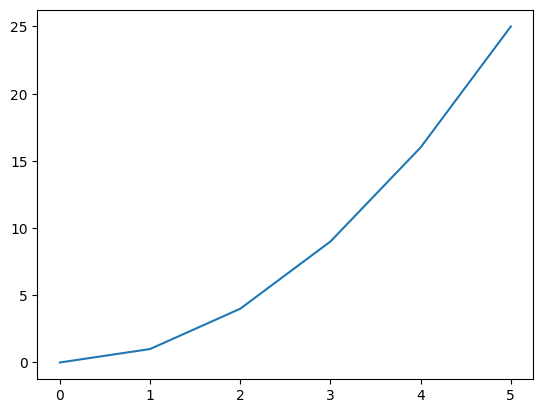

In [5]:
# Линейная диаграмма (график)
plt.plot(y) # Функция для построения

plt.show() # Функция для вывода графика

# Если предать 1 значение, то функция их расположит по вертикальной оси,
# а по горизонтальной оси расположит порядковые номера, начиная с 0, с шагом 1

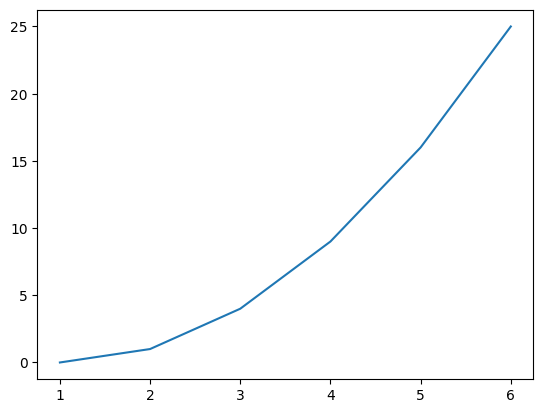

In [6]:
plt.plot(x, y)

plt.show()

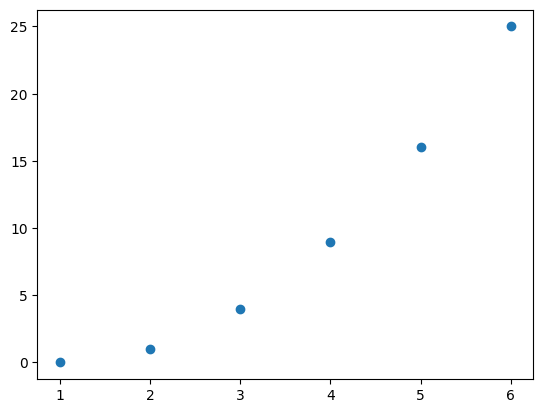

In [7]:
# Точечная диаграмма (диаграмма разброса)
plt.scatter(x, y)

plt.show()

### Логарифмический масштаб

In [8]:
planets = ['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune']
masses = [0.055274, 0.815, 1.0, 0.107, 317.8, 95.0, 14.6, 17.147] # Масса планет Солнечной системы по отношению к Земле

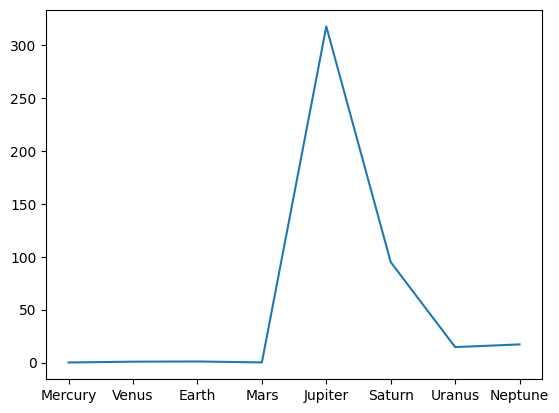

In [9]:
# Без применения логарифмического масштаба (линейный масштаб)
plt.plot(planets, masses)

plt.show()

In [10]:
masses[planets.index('Earth')] / masses[planets.index('Mercury')]

18.091688678221225

Хоть масса земли и меркурия различается в 18 раз, на линейном масштабе это не видно.

Применим логарифмический масштаб

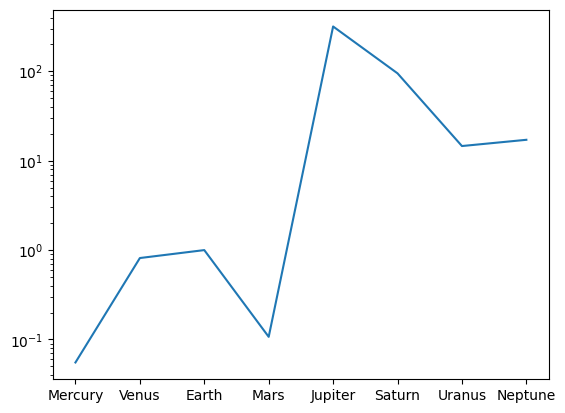

In [11]:
# Логарифмический масштаб на вертикальной оси
plt.plot(planets, masses)
plt.yscale(value='log')

plt.show()

Создадим на основе двух списков Series

In [12]:
planet_info = pd.Series(masses, index=planets)
planet_info

Mercury      0.055274
Venus        0.815000
Earth        1.000000
Mars         0.107000
Jupiter    317.800000
Saturn      95.000000
Uranus      14.600000
Neptune     17.147000
dtype: float64

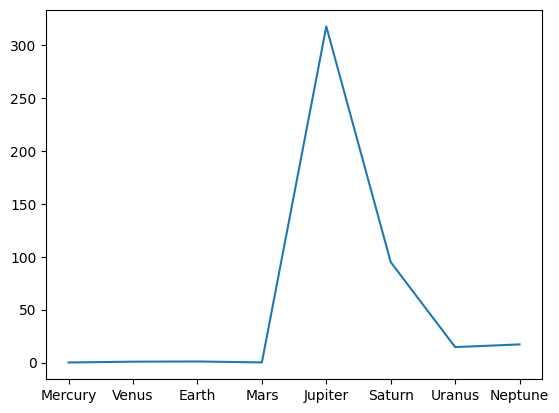

In [13]:
# Линейная диаграмма из Series
planet_info.plot()

plt.show()

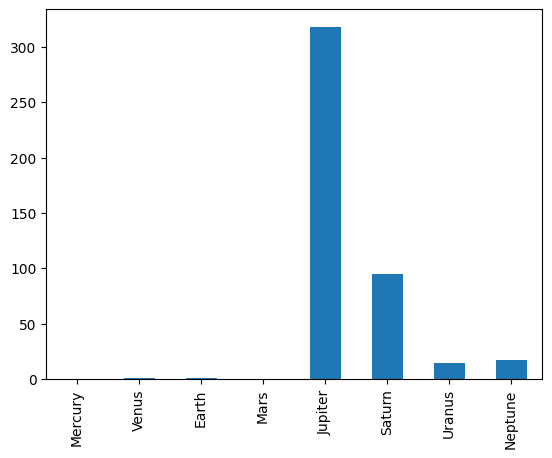

In [14]:
# Столбчатая диаграмма (kind='bar')
planet_info.plot(kind='bar') 

plt.show()

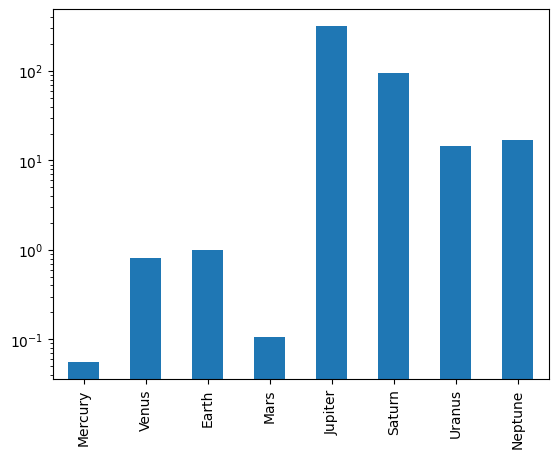

In [15]:
# logy=True - применит логарифмический масштаб к вертикальной оси (к той оси, на которой расположен данные о массе планет)
planet_info.plot(kind='bar', logy=True)

plt.show()

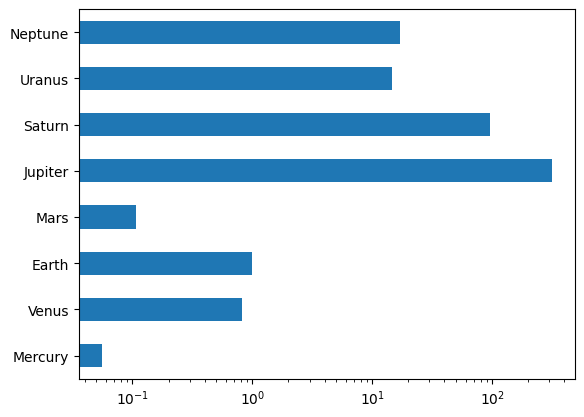

In [16]:
# kind='barh' - гризонтальное расположение столбцов
# logx=True - логарифмический масштаб для горизонтальной оси
planet_info.plot(kind='barh', logx=True)

plt.show()

### Построение гистограмм

Благодоря гистограммам, можно наглядно изобразить каким образом распределена некоторая величина в выборке

In [17]:
a = [i for i in range(10)]
a

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

(array([3., 3., 4.]), array([0., 3., 6., 9.]), <BarContainer object of 3 artists>)


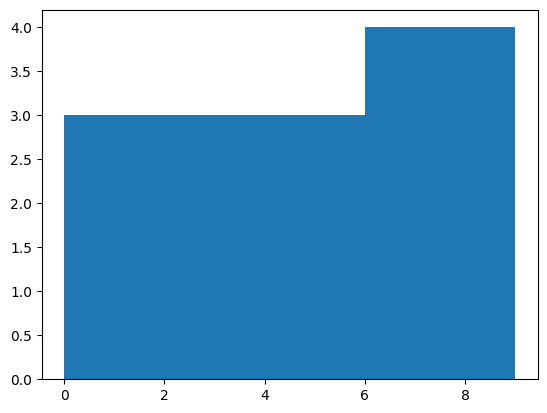

In [18]:
# plt.hist - построение гистограммы
# bins=3 - это число промежутков (количество бинов на которое будет разбита ось со значениями этих чисел)
# По умолчанию bins = 10
hist_info = plt.hist(a, bins=3)
# Записываем информацию о гистограмме в hist_info, чтобы увидеть сколько элементов списка попало в каждый бин
print(hist_info)

plt.show()

Если столбцы гистограммы расположенны вертикально (по умолчанию), то по горизонтальной оси будут распологаться значения из того списка чисел, который мы создали, а по вертикали, количество чисел в промежутке на которые разбита горизонтальная ось (число этих промежутков мы выбираем сами).

In [19]:
a

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

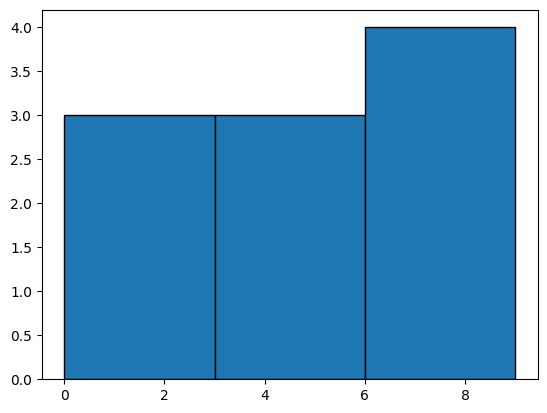

In [19]:
# Как мы видим, что прямоугольники сливаются воедино
# edgecolor='black' - Задать цвет границам
plt.hist(a, bins=3, edgecolor='black')

plt.show()

(array([3., 3., 4.]),
 array([0., 3., 6., 9.]),
 <BarContainer object of 3 artists>)

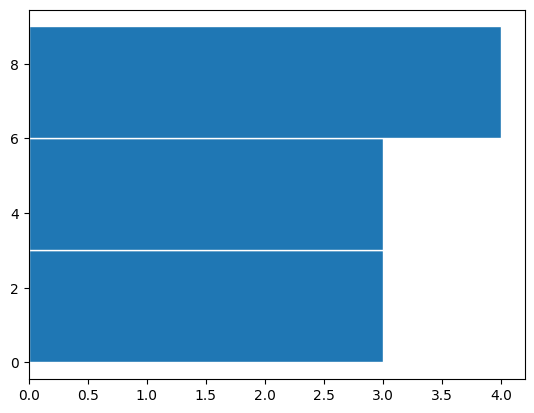

In [20]:
# ec - синоним edgecolor
# orientation='horizontal' - прямоугольники распологаются горизонтально
plt.hist(a, bins=3, orientation='horizontal', ec='white')

### Визуализация данных на примере индекса Биг-Мака

Индекс Биг-Мака - неофициальный способ определения паритета покупательной способности

In [23]:
# Данные с сайта журнала The Economist за январь 2018 года
url='http://infographics.economist.com/2018/databank/BMFile2000toJan2018.xls'

In [26]:
!pip install xlrd


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     -------------------------------------- 96.5/96.5 kB 553.1 kB/s eta 0:00:00


In [27]:
# С помощью функци read_excel можно читать данные не только из файлов на компьютере,
# но и с веб-сервера по ссылке
bmi = pd.read_excel(url, storage_options={'User-Agent': 'Mozilla/5.0'})

In [28]:
# Информация о полученном DataFrame
bmi.shape

(57, 11)

In [29]:
bmi.columns

Index(['Country', 'local_price', 'dollar_ex', 'dollar_price', 'dollar_ppp',
       'dollar_valuation', 'dollar_adj_valuation', 'euro_adj_valuation',
       'sterling_adj_valuation', 'yen_adj_valuation', 'yuan_adj_valuation'],
      dtype='object')

In [30]:
bmi.iloc[:, :4].head(10)

,Country,local_price,dollar_ex,dollar_price
0,Argentina,75.00,18.937500,3.960396
1,Australia,5.90,1.253683,4.706135
2,Brazil,16.50,3.227900,5.111683
3,Britain,3.19,0.722857,4.413046
4,Canada,6.55,1.245900,5.257244
5,Chile,2600.00,605.935000,4.290889
6,China,20.40,6.432000,3.171642
7,Colombia,10900.00,2844.120000,3.832468
8,Costa Rica,2290.00,568.530000,4.027932
9,Czech Republic,79.00,20.747000,3.807779


In [31]:
# Получаем Series из DataFrame, где в качестве индекса выступает название страны (Country),
# а в качестве данныъ, цена Биг-Мака в долларах (dollar_price)
bm_price_series = bmi.set_index('Country')['dollar_price']
bm_price_series.head()

Country
Argentina    3.960396
Australia    4.706135
Brazil       5.111683
Britain      4.413046
Canada       5.257244
Name: dollar_price, dtype: float64

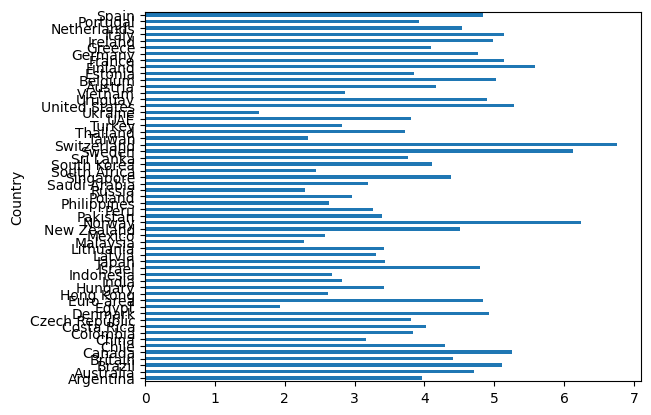

In [32]:
# Построим столбчатую диаграмму расположенную горизонтально
bm_price_series.plot(kind='barh')
plt.show()

Результат получился не читабельным, увеличи масштаб.

In [33]:
# Используем объект rcParams, для увиличения масштаба отображения графики
from pylab import rcParams

# Размеры 9 - ширина 12- выстота в дюймах
rcParams['figure.figsize'] = 9, 12

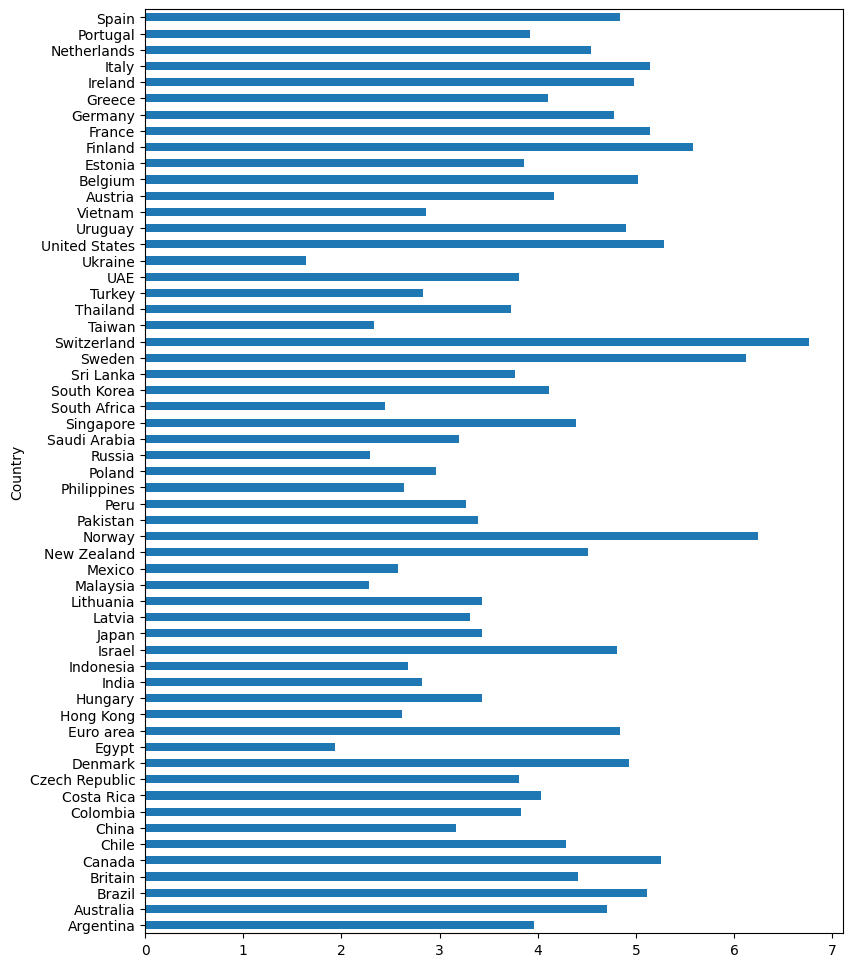

In [34]:
bm_price_series.plot(kind='barh')

plt.show()

На графике хорошо видно название стран, но значения не отсортированы.

Отсортируем значения по цене Биг-Мака

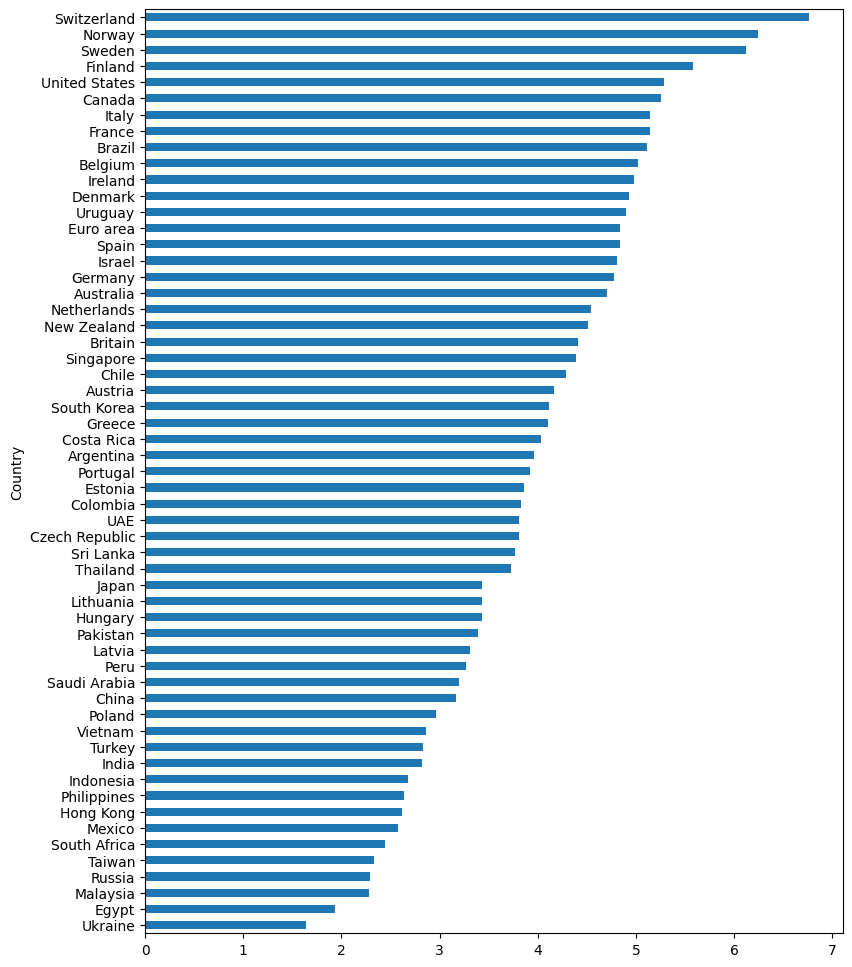

In [35]:
# Сортировка по значеню
bm_price_series.sort_values().plot(kind='barh')

plt.show()

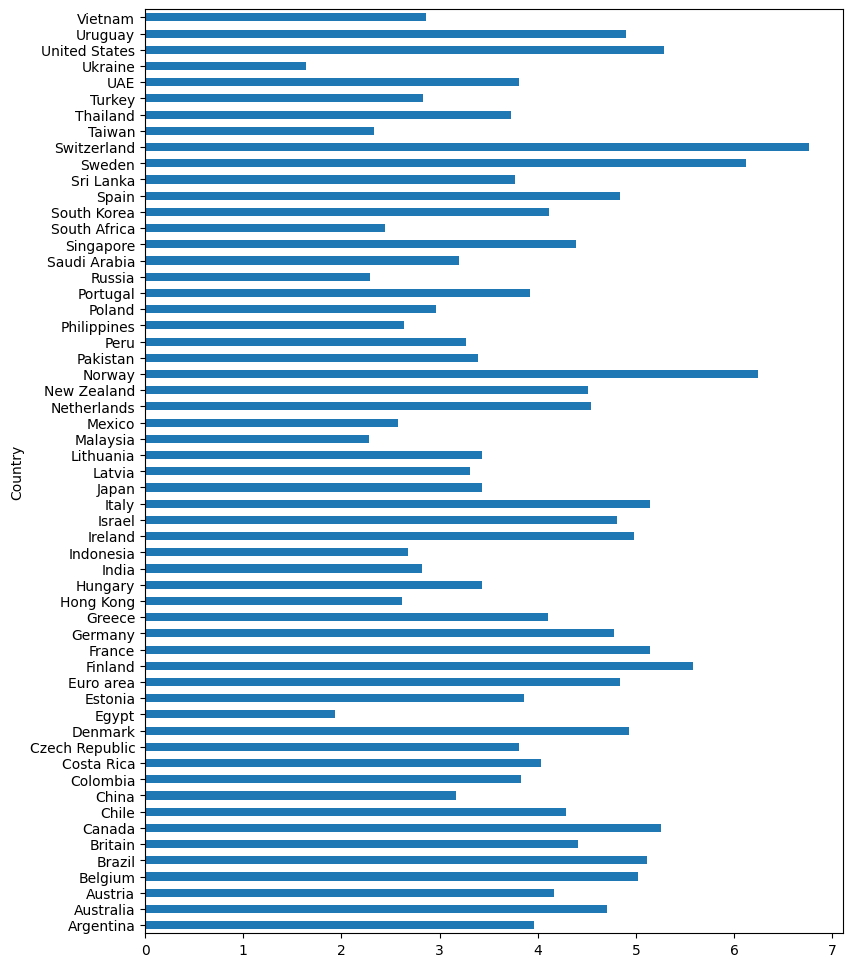

In [36]:
# Сортировка по индексу (Получим расположение стран в алфавитном порядке)
bm_price_series.sort_index().plot(kind='barh')

plt.show()

Сортировка стран получилась в убывающем порядке, его можно изменить, 
задав ascending=False

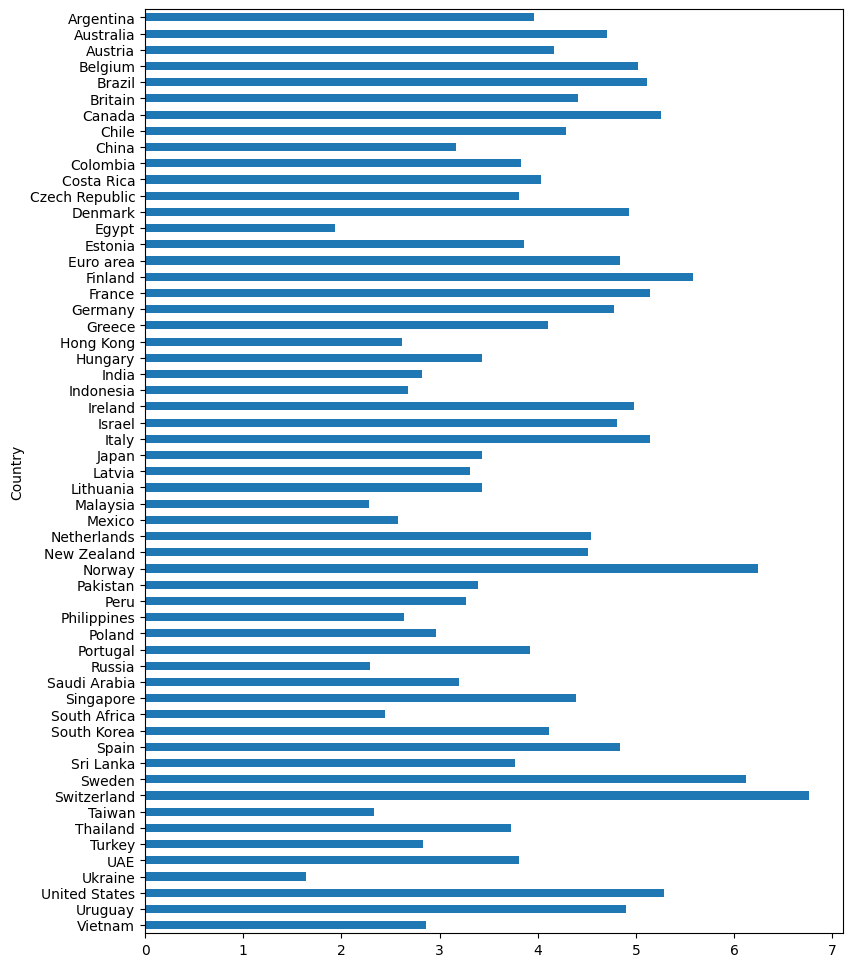

In [37]:
bm_price_series.sort_index(ascending=False).plot(kind='barh')

plt.show()

Построим гистограмму, чтобы получить представление о том
как распределены цены

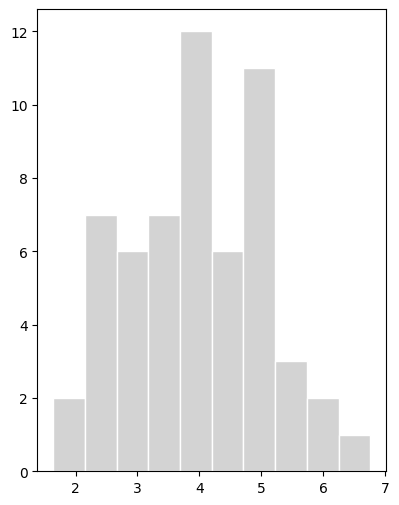

In [38]:
# Уменьшим размер графика с помощью rcParams
rcParams['figure.figsize'] = 4.5, 6

# Построим гистограмму
# color='lightgrey' - Цвет гистограммы
plt.hist(bm_price_series, ec='white', color='lightgrey')

plt.show()
# По умолчанию у нас будет 10 бинов

### Сохранение графиков в файл

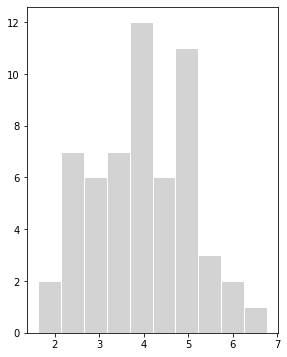

In [35]:
plt.hist(bm_price_series, ec='white', color='lightgrey')

# Сохраним гистограмму с помощью функции savefig
# 'img/BM_price' - Нзвание файла или путь к нему 
# fmt='png' - Формат файла

plt.savefig('img/BM_price', fmt='bmp')
plt.show()

-------------

# 2. Выведение дополнительной информации на график

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
# Установим необходимые размеры графика
rcParams['figure.figsize'] = 6, 4.5

### Форматирование текста для графика

In [40]:
x = np.linspace(-5, 5, 101)
x

array([-5. , -4.9, -4.8, -4.7, -4.6, -4.5, -4.4, -4.3, -4.2, -4.1, -4. ,
       -3.9, -3.8, -3.7, -3.6, -3.5, -3.4, -3.3, -3.2, -3.1, -3. , -2.9,
       -2.8, -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1, -2. , -1.9, -1.8,
       -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. , -0.9, -0.8, -0.7,
       -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,
        0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,  1.2,  1.3,  1.4,  1.5,
        1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,  2.3,  2.4,  2.5,  2.6,
        2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,  3.4,  3.5,  3.6,  3.7,
        3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,  4.5,  4.6,  4.7,  4.8,
        4.9,  5. ])

In [41]:
x2 = x**2
x2

array([2.500e+01, 2.401e+01, 2.304e+01, 2.209e+01, 2.116e+01, 2.025e+01,
       1.936e+01, 1.849e+01, 1.764e+01, 1.681e+01, 1.600e+01, 1.521e+01,
       1.444e+01, 1.369e+01, 1.296e+01, 1.225e+01, 1.156e+01, 1.089e+01,
       1.024e+01, 9.610e+00, 9.000e+00, 8.410e+00, 7.840e+00, 7.290e+00,
       6.760e+00, 6.250e+00, 5.760e+00, 5.290e+00, 4.840e+00, 4.410e+00,
       4.000e+00, 3.610e+00, 3.240e+00, 2.890e+00, 2.560e+00, 2.250e+00,
       1.960e+00, 1.690e+00, 1.440e+00, 1.210e+00, 1.000e+00, 8.100e-01,
       6.400e-01, 4.900e-01, 3.600e-01, 2.500e-01, 1.600e-01, 9.000e-02,
       4.000e-02, 1.000e-02, 0.000e+00, 1.000e-02, 4.000e-02, 9.000e-02,
       1.600e-01, 2.500e-01, 3.600e-01, 4.900e-01, 6.400e-01, 8.100e-01,
       1.000e+00, 1.210e+00, 1.440e+00, 1.690e+00, 1.960e+00, 2.250e+00,
       2.560e+00, 2.890e+00, 3.240e+00, 3.610e+00, 4.000e+00, 4.410e+00,
       4.840e+00, 5.290e+00, 5.760e+00, 6.250e+00, 6.760e+00, 7.290e+00,
       7.840e+00, 8.410e+00, 9.000e+00, 9.610e+00, 

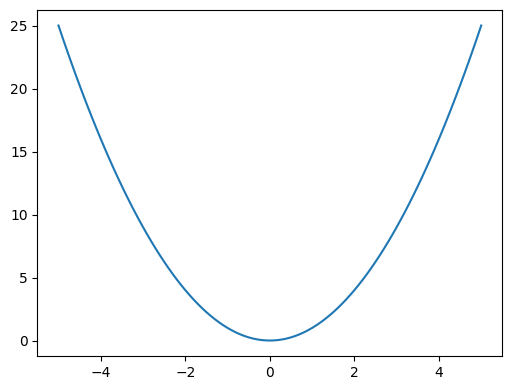

In [42]:
# Построим график, где кординаты по горизонтальной оси - это чилса из массива Х
# а координаты и вертикальной оси - числа из Х2
plt.plot(x, x2)

plt.show()

Добавим название графика

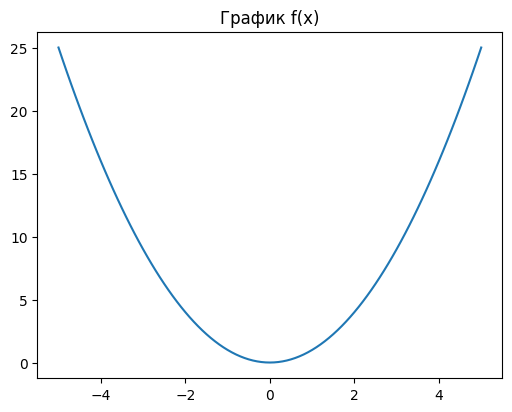

In [43]:
plt.plot(x, x2)
plt.title('График f(x)')

plt.show()

Изменим настройки для большей чёткости

In [44]:
# SVG (Scalable Vector Graphics) - Масштабиремая векторная графика
%config InlineBackend.figure_format = 'svg'

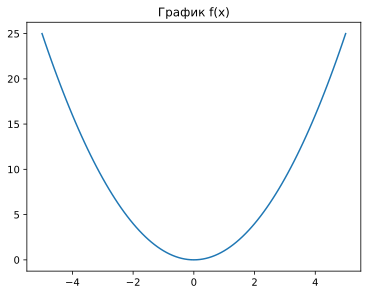

In [45]:
plt.plot(x, x2)
plt.title('График f(x)')

plt.show()

Изменение размера текста

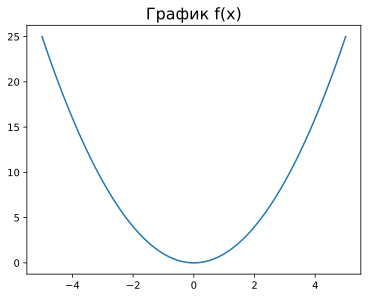

In [46]:
plt.plot(x, x2)
plt.title('График f(x)', fontsize=16)

plt.show()

Изменим насыщенность текста

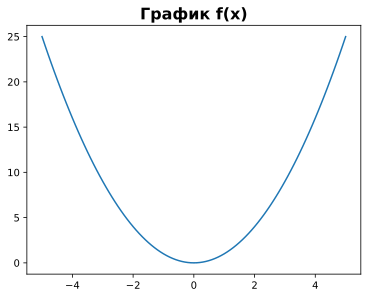

In [47]:
plt.plot(x, x2)
plt.title('График f(x)', fontsize=16, fontweight='bold')
plt.show()

Изменим цвет для названия

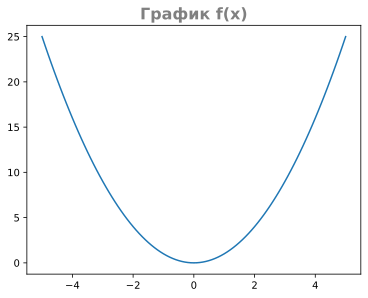

In [48]:
# Цвет можно указать из таблицы цветов HTML или в формате HEX (шестнадцатеричная система исчисления)
plt.plot(x, x2)
plt.title('График f(x)', fontsize=16, fontweight='bold', color='#808080')

plt.show()

In [49]:
title_dict = {'fontsize': 20, 'fontweight': 'bold', 'color': '#808080', 'family': 'Calibri'}

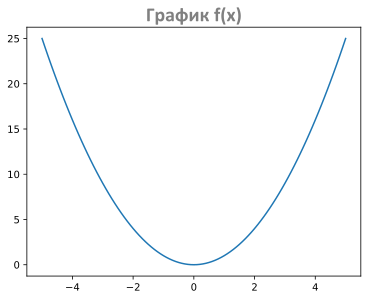

In [50]:
# fontdict - Этот аргумент может принять словарь содержащий необходиме данные для форматироания текста
plt.plot(x, x2)
plt.title('График f(x)', fontdict=title_dict)

plt.show()

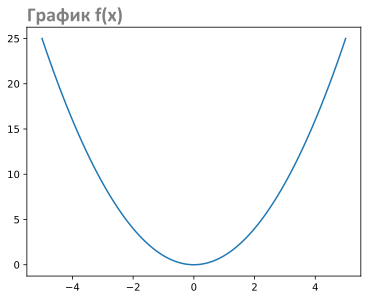

In [51]:
plt.plot(x, x2)
# loc - Расположение названия гафика (по умолчанию "center")
plt.title('График f(x)', fontdict=title_dict, loc='left')

plt.show()

Добавление названия осей

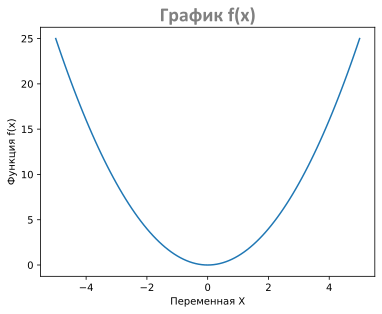

In [52]:
plt.plot(x, x2)

plt.title('График f(x)', fontdict=title_dict)

plt.xlabel('Переменная Х')
plt.ylabel('Функция f(x)')

plt.show()

Зададим параметры шрифта для названия осей

In [53]:
lable_dict = {'fontsize': '14', 'color': '#808080', 'family': 'Calibri'}

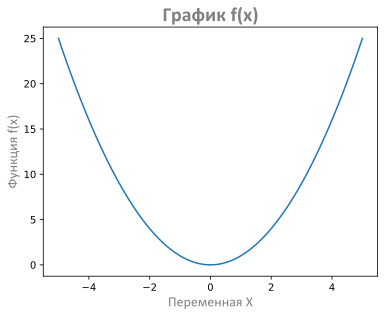

In [54]:
plt.plot(x, x2)

plt.title('График f(x)', fontdict=title_dict)

plt.xlabel('Переменная Х', fontdict=lable_dict)
plt.ylabel('Функция f(x)', fontdict=lable_dict)

plt.show()

Добавим график ещё одной функции

In [55]:
x3 = x**3
x3

array([-1.25000e+02, -1.17649e+02, -1.10592e+02, -1.03823e+02,
       -9.73360e+01, -9.11250e+01, -8.51840e+01, -7.95070e+01,
       -7.40880e+01, -6.89210e+01, -6.40000e+01, -5.93190e+01,
       -5.48720e+01, -5.06530e+01, -4.66560e+01, -4.28750e+01,
       -3.93040e+01, -3.59370e+01, -3.27680e+01, -2.97910e+01,
       -2.70000e+01, -2.43890e+01, -2.19520e+01, -1.96830e+01,
       -1.75760e+01, -1.56250e+01, -1.38240e+01, -1.21670e+01,
       -1.06480e+01, -9.26100e+00, -8.00000e+00, -6.85900e+00,
       -5.83200e+00, -4.91300e+00, -4.09600e+00, -3.37500e+00,
       -2.74400e+00, -2.19700e+00, -1.72800e+00, -1.33100e+00,
       -1.00000e+00, -7.29000e-01, -5.12000e-01, -3.43000e-01,
       -2.16000e-01, -1.25000e-01, -6.40000e-02, -2.70000e-02,
       -8.00000e-03, -1.00000e-03,  0.00000e+00,  1.00000e-03,
        8.00000e-03,  2.70000e-02,  6.40000e-02,  1.25000e-01,
        2.16000e-01,  3.43000e-01,  5.12000e-01,  7.29000e-01,
        1.00000e+00,  1.33100e+00,  1.72800e+00,  2.197

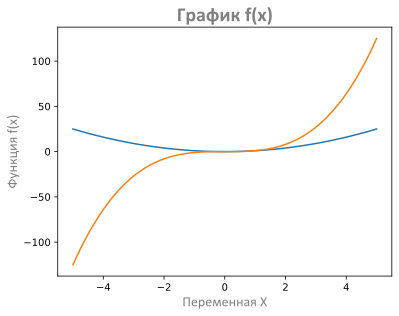

In [56]:
# Теперь график содержит две линии
plt.plot(x, x2)
plt.plot(x, x3)

plt.title('График f(x)', fontdict=title_dict)

plt.xlabel('Переменная Х', fontdict=lable_dict)
plt.ylabel('Функция f(x)', fontdict=lable_dict)

plt.show()

Масштаб горизонтальной и вертикальной оси сильно различается

### Ограничение осей

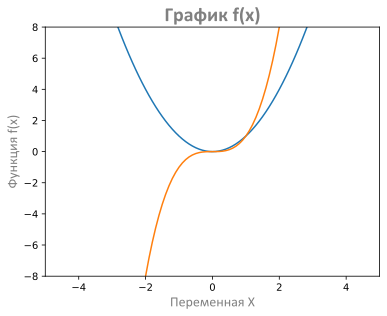

In [57]:
# plt.axis([min значение, max значение по горизонтальной оси, min, max по вертикальной оси])
plt.axis([-5, 5, -8, 8])
# Теперь график ограничен этими значениями

plt.plot(x, x2)
plt.plot(x, x3)

plt.title('График f(x)', fontdict=title_dict)

plt.xlabel('Переменная Х', fontdict=lable_dict)
plt.ylabel('Функция f(x)', fontdict=lable_dict)

plt.show()

### Добавление легенды

Легенда нужна когда на 1 графике имеется несколько линий

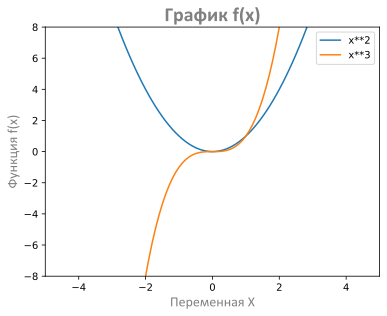

In [58]:
plt.axis([-5, 5, -8, 8])

plt.plot(x, x2)
plt.plot(x, x3)

plt.title('График f(x)', fontdict=title_dict)

plt.xlabel('Переменная Х', fontdict=lable_dict)
plt.ylabel('Функция f(x)', fontdict=lable_dict)

plt.legend(labels=['x**2', 'x**3'])

plt.show()

Данный способ не очень удобен так как можно ошибиться





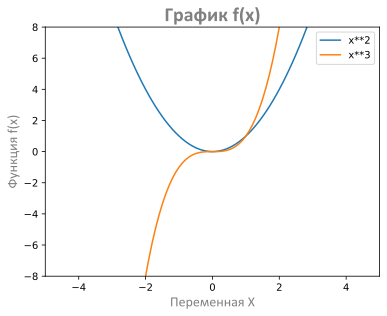

In [59]:
plt.axis([-5, 5, -8, 8])

# А аргументы lebel мы укажем сразу в функции plot 
plt.plot(x, x2, label='x**2')
plt.plot(x, x3, label='x**3')

plt.title('График f(x)', fontdict=title_dict)

plt.xlabel('Переменная Х', fontdict=lable_dict)
plt.ylabel('Функция f(x)', fontdict=lable_dict)

# Прописывем legend без аргументов
plt.legend()

plt.show()

##### Оформление внешнего вида Легенды

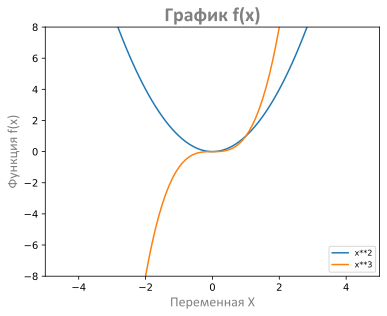

In [60]:
plt.axis([-5, 5, -8, 8])


plt.plot(x, x2, label='x**2')
plt.plot(x, x3, label='x**3')

plt.title('График f(x)', fontdict=title_dict)

plt.xlabel('Переменная Х', fontdict=lable_dict)
plt.ylabel('Функция f(x)', fontdict=lable_dict)

# loc - Перемещение легенды
# fontsize - Размер шрифта
plt.legend(loc='lower right', fontsize=8)

plt.show()

In [61]:
# Либо можно воспользоваться словарём
legend_dict = {'family': 'Calibri', 'size':10}

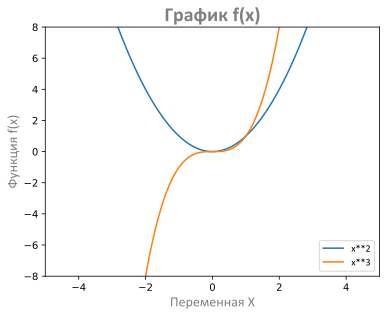

In [62]:
plt.axis([-5, 5, -8, 8])


plt.plot(x, x2, label='x**2')
plt.plot(x, x3, label='x**3')

plt.title('График f(x)', fontdict=title_dict)

plt.xlabel('Переменная Х', fontdict=lable_dict)
plt.ylabel('Функция f(x)', fontdict=lable_dict)

# Изменение настроек легенды через словарь
plt.legend(loc='lower right', prop=legend_dict)

plt.show()

Замена цвета текста легенды



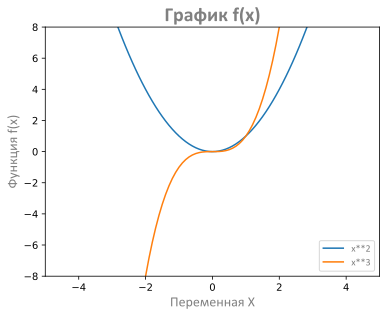

In [63]:
plt.axis([-5, 5, -8, 8])


plt.plot(x, x2, label='x**2')
plt.plot(x, x3, label='x**3')

plt.title('График f(x)', fontdict=title_dict)

plt.xlabel('Переменная Х', fontdict=lable_dict)
plt.ylabel('Функция f(x)', fontdict=lable_dict)

legend = plt.legend(loc='lower right', prop=legend_dict)

# Используем функцию setp и будем отправлять в неё текст легенды, 
# полученный с помощью метода get_texts()
# color='grey' - Цвет определим как серый
plt.setp(legend.get_texts(), color='grey')

plt.show()

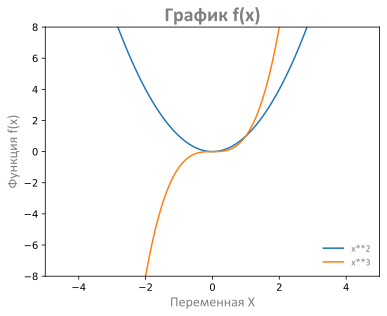

In [64]:
plt.axis([-5, 5, -8, 8])


plt.plot(x, x2, label='x**2')
plt.plot(x, x3, label='x**3')

plt.title('График f(x)', fontdict=title_dict)

plt.xlabel('Переменная Х', fontdict=lable_dict)
plt.ylabel('Функция f(x)', fontdict=lable_dict)

# frameon=False - убираем рамку у легенды
legend = plt.legend(loc='lower right', prop=legend_dict, frameon=False)

plt.setp(legend.get_texts(), color='grey')

plt.show()

### Оформление линий и сетки графика

Оформление линий графика

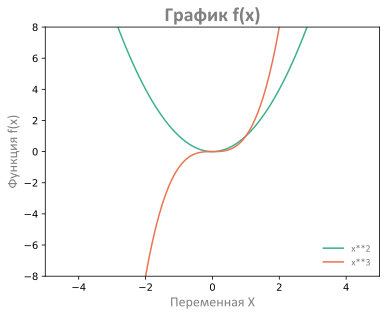

In [65]:
plt.axis([-5, 5, -8, 8])
# color - Задаём цвет линий
plt.plot(x, x2, label='x**2', color='#3bb08f')
plt.plot(x, x3, label='x**3', color='#e97451')

plt.title('График f(x)', fontdict=title_dict)
plt.xlabel('Переменная Х', fontdict=lable_dict)
plt.ylabel('Функция f(x)', fontdict=lable_dict)


legend = plt.legend(loc='lower right', prop=legend_dict, frameon=False)
plt.setp(legend.get_texts(), color='grey')

plt.show()

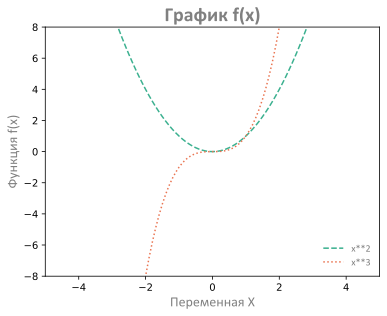

In [66]:
plt.axis([-5, 5, -8, 8])
# linestyle='dashed' - Задаём стиль линии графика (По умолчанию сплошная линия)
plt.plot(x, x2, label='x**2', color='#3bb08f', linestyle='dashed')
plt.plot(x, x3, label='x**3', color='#e97451', linestyle='dotted')

plt.title('График f(x)', fontdict=title_dict)
plt.xlabel('Переменная Х', fontdict=lable_dict)
plt.ylabel('Функция f(x)', fontdict=lable_dict)


legend = plt.legend(loc='lower right', prop=legend_dict, frameon=False)
plt.setp(legend.get_texts(), color='grey')

plt.show()

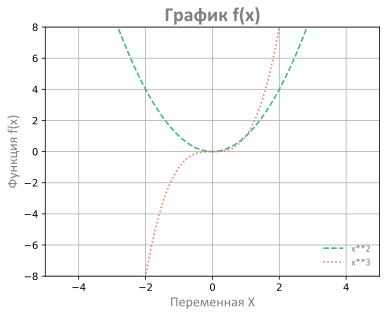

In [67]:
plt.axis([-5, 5, -8, 8])

plt.plot(x, x2, label='x**2', color='#3bb08f', linestyle='dashed')
plt.plot(x, x3, label='x**3', color='#e97451', linestyle='dotted')

plt.title('График f(x)', fontdict=title_dict)
plt.xlabel('Переменная Х', fontdict=lable_dict)
plt.ylabel('Функция f(x)', fontdict=lable_dict)
legend = plt.legend(loc='lower right', prop=legend_dict, frameon=False)
plt.setp(legend.get_texts(), color='grey')

# grid() - Наносим сетку на график
plt.grid()
plt.show()

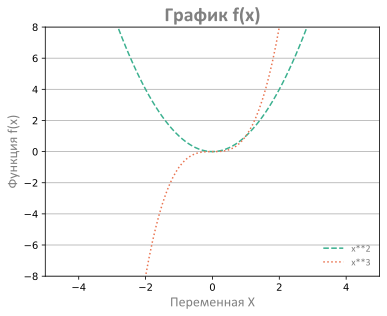

In [68]:
plt.axis([-5, 5, -8, 8])

plt.plot(x, x2, label='x**2', color='#3bb08f', linestyle='dashed')
plt.plot(x, x3, label='x**3', color='#e97451', linestyle='dotted')

plt.title('График f(x)', fontdict=title_dict)
plt.xlabel('Переменная Х', fontdict=lable_dict)
plt.ylabel('Функция f(x)', fontdict=lable_dict)
legend = plt.legend(loc='lower right', prop=legend_dict, frameon=False)
plt.setp(legend.get_texts(), color='grey')

# grid(axis='y') - Наносим сетку на график для оси y
plt.grid(axis='y')

plt.show()

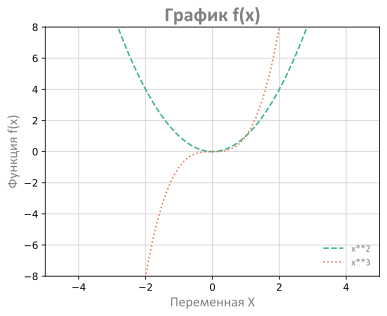

In [69]:
plt.axis([-5, 5, -8, 8])

plt.plot(x, x2, label='x**2', color='#3bb08f', linestyle='dashed')
plt.plot(x, x3, label='x**3', color='#e97451', linestyle='dotted')

plt.title('График f(x)', fontdict=title_dict)
plt.xlabel('Переменная Х', fontdict=lable_dict)
plt.ylabel('Функция f(x)', fontdict=lable_dict)
legend = plt.legend(loc='lower right', prop=legend_dict, frameon=False)
plt.setp(legend.get_texts(), color='grey')

# ghostwhite - призрачно-белый цвет
# grid(color='lightgrey') - Задаём цвет сетки
plt.grid(color='lightgrey')

plt.show()

-------------

# 3. Объекты библиотеки Matlplotlib

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

Figure и axes - основыне объекты библиотеки Matplotlib. 

Figure (Определённое выделенное место, где может распологаться один или несколько графиков)

Объекты axes распологаются внутри figure

In [71]:
x = np.linspace(-5, 5, 101)
x2 = x**2
x3 = x**3

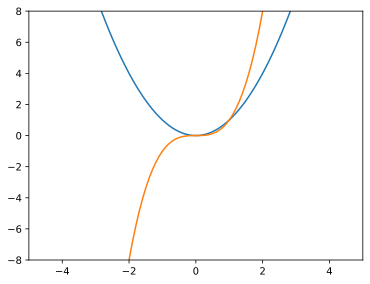

In [72]:
# Построение графика с помощью  структурного подхода (как обычно)
plt.axis([-5, 5, -8, 8])
plt.plot(x, x2)
plt.plot(x, x3)

plt.show()

Получен график, где показаны обе функции.

А если надо создать 2 графика или больше?
#### Объектно ориентированный подход

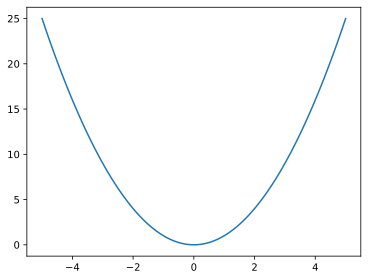

In [73]:
# subplots(nrows= строки, ncols=столбцы) - создаёт объект fig (фигура), а так же
# создаёт сетку для объектов

# В 1 строке и 1 столбце можно разместить 1 axis
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(x, x2)

plt.show()

**Создание объектов figure и axes**

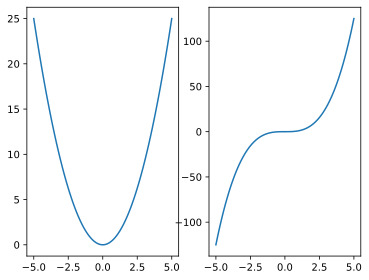

In [74]:
fig, ax = plt.subplots(nrows=1, ncols=2)

# Записываем значения массива numpy в кортеж
ax1, ax2 = ax

# Для каждого объекта применяем метод Plot
ax1.plot(x, x2)
ax2.plot(x, x3)

plt.show()

## Расположение axes внутри объекта figure

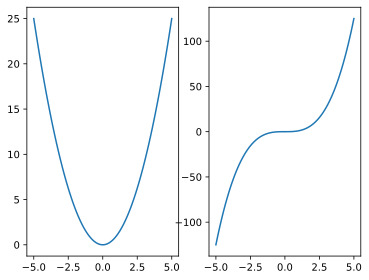

In [75]:
fig, ax = plt.subplots(nrows=1, ncols=2)

# flatten - распремление массива в одномерный
# Упростит получение объектов из массива
ax1, ax2 = ax.flatten()

ax1.plot(x, x2)
ax2.plot(x, x3)

plt.show()

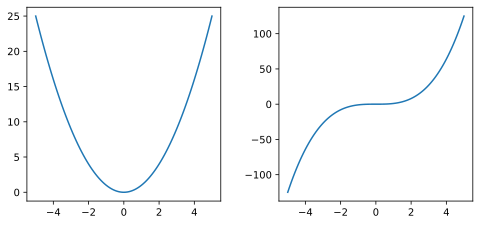

In [80]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax1, ax2 = ax.flatten()
ax1.plot(x, x2)
ax2.plot(x, x3)

# Задаём значение ширины и высоты фигуры в дюймах
fig.set_size_inches(8, 3.5)

# Увеличение ширины фигуры 
# 0.3 - это не дюймы, а доля от среднего значения горизонтальных осей графиков
# wspace - начинаится с буквы W, так как это сокращение от width (Ширина) Отвечает за растояние между графиками по горизонатли
plt.subplots_adjust(wspace=0.3)

Расположим эти графики в два ряда

(2,)


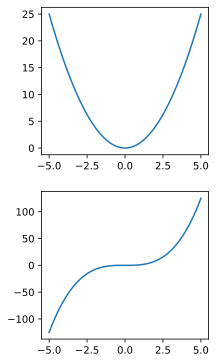

In [81]:
# Для этого зададим 2 строки и 1 столбец
fig, ax = plt.subplots(nrows=2, ncols=1)
print(ax.shape)
ax1, ax2 = ax.flatten()
ax1.plot(x, x2)
ax2.plot(x, x3)

fig.set_size_inches(3, 6)
# Установим растояние между графиками равное четверти их средней высоты
plt.subplots_adjust(hspace=0.25)

In [82]:
# Создадим 2 массива
y = np.sin(x)
z = np.cos(x)

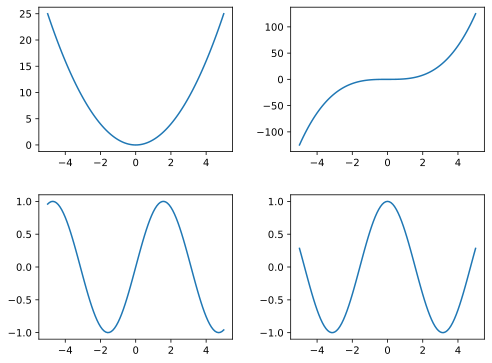

In [83]:
fig, ax = plt.subplots(nrows=2, ncols=2)
ax1, ax2, ax3, ax4 = ax.flatten()

ax1.plot(x, x2)
ax2.plot(x, x3)
ax3.plot(x, y)
ax4.plot(x, z)

fig.set_size_inches(8, 6)
plt.subplots_adjust(wspace=0.3, hspace=0.30)

## Редактирование объекта axes

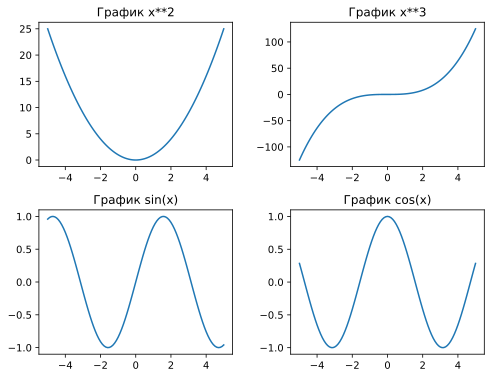

In [85]:
fig, ax = plt.subplots(nrows=2, ncols=2)
ax1, ax2, ax3, ax4 = ax.flatten()

# set_title - Установим названия для графиков
ax1.plot(x, x2)
ax1.set_title('График х**2')

ax2.plot(x, x3)
ax2.set_title('График х**3')

ax3.plot(x, y)
ax3.set_title('График sin(x)')

ax4.plot(x, z)
ax4.set_title('График cos(x)')

fig.set_size_inches(8, 6)
plt.subplots_adjust(wspace=0.3, hspace=0.3)

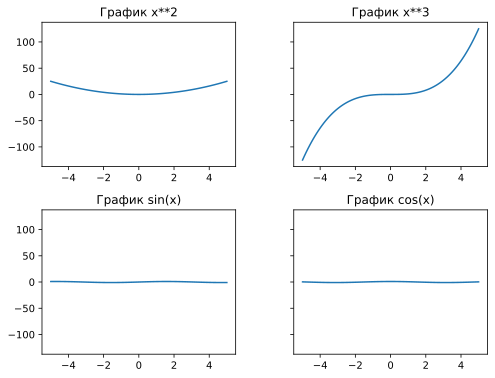

In [86]:
# sharey=True - Размах оси У стал одинаковый от -100 до 100
fig, ax = plt.subplots(nrows=2, ncols=2, sharey=True)
ax1, ax2, ax3, ax4 = ax.flatten()

# set_title - Установим названия для графиков
ax1.plot(x, x2)
ax1.set_title('График х**2')

ax2.plot(x, x3)
ax2.set_title('График х**3')

ax3.plot(x, y)
ax3.set_title('График sin(x)')

ax4.plot(x, z)
ax4.set_title('График cos(x)')

fig.set_size_inches(8, 6)
plt.subplots_adjust(wspace=0.3, hspace=0.30)

Также границы осей можно установить индивидульно для каждого графика

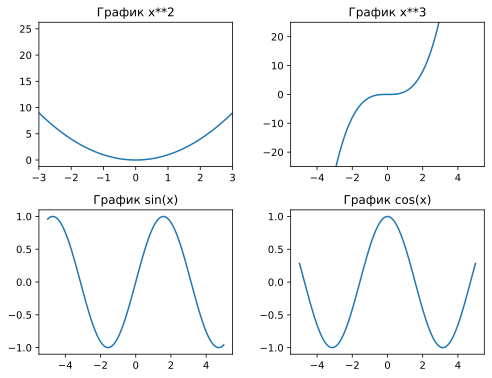

In [87]:
fig, ax = plt.subplots(nrows=2, ncols=2)
ax1, ax2, ax3, ax4 = ax.flatten()

ax1.plot(x, x2)
ax1.set_title('График х**2')
# Установили границы для оси Х в 1-ом объекте axis
ax1.set_xlim([-3, 3])

ax2.plot(x, x3)
ax2.set_title('График х**3')
# Установили границы для оси У в 2-ом объекте axis
ax2.set_ylim([-25, 25])

ax3.plot(x, y)
ax3.set_title('График sin(x)')

ax4.plot(x, z)
ax4.set_title('График cos(x)')

fig.set_size_inches(8, 6)
plt.subplots_adjust(wspace=0.3, hspace=0.30)